In [1]:
# 1.import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

Vietcombank

In [ ]:
# 2. Đọc file dữ liệu stock price và chia train test theo tỉ lệ 7:3
vcb = pd.read_csv('/content/VCB.csv',sep=";")
vcb = vcb[['Price']]
vcb = vcb.dropna() # Drop missing values
vcb = vcb.reset_index(drop=True) # Reset the index

In [ ]:
vcb

,Price
0,22899
1,23169
2,22899
3,22738
4,22576
...,...
1991,80900
1992,80900
1993,81800
1994,82800


In [ ]:
#Split the data into training, testing
train_size = int(0.7 * len(vcb))
test_size = len(vcb) - train_size

train_data = vcb[:train_size]
test_data = vcb[train_size:train_size+test_size]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  vcb.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[103944.96526674 103988.15316248 104031.34105823 104074.52895397
 104117.71684971 104160.90474545 104204.0926412  104247.28053694
 104290.46843268 104333.65632843 104376.84422417 104420.03211991
 104463.22001565 104506.4079114  104549.59580714 104592.78370288
 104635.97159862 104679.15949437 104722.34739011 104765.53528585
 104808.7231816  104851.91107734 104895.09897308 104938.28686882
 104981.47476457 105024.66266031 105067.85055605 105111.03845179
 105154.22634754 105197.41424328]


In [ ]:
# 6. Tính RMSE, MAPE, MSLE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ",  msle)

Testing RMSE: 10508.767655526244
MAPE: 10.714213337938835
MSLE:  0.014940793246427804


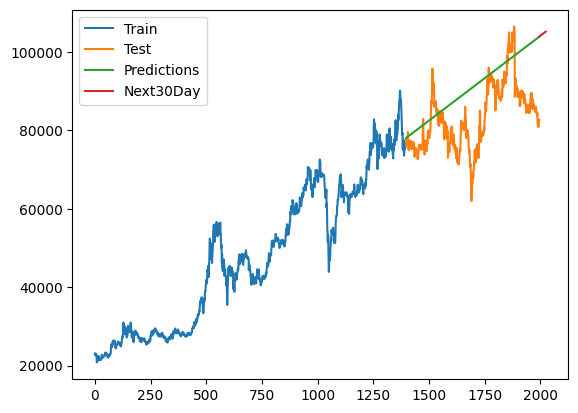

In [ ]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1397, stop=1996, step=1)

MB bank

In [3]:
#2. Đọc file dữ liệu stock price và chia train test theo tỉ lệ 7:3
mbb = pd.read_csv('/content/MBB.csv')
mbb = mbb[['Price']]
mbb = mbb.dropna() # Drop missing values
mbb = mbb.reset_index(drop=True) # Reset the index

In [4]:
mbb

,Price
0,4894
1,4929
2,4859
3,4824
4,4789
...,...
1991,18150
1992,18300
1993,18400
1994,18450


In [5]:
#Split the data into training, testing
train_size = int(0.7 * len(mbb))
test_size = len(mbb) - train_size

train_data = mbb[:train_size]
test_data = mbb[train_size:train_size+test_size]

In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [7]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [9]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  mbb.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days: ')
print(y_next_30_days)

Predicted closing prices for the next 30 days: 
[21138.18458744 21146.56820601 21154.95182459 21163.33544317
 21171.71906175 21180.10268033 21188.4862989  21196.86991748
 21205.25353606 21213.63715464 21222.02077321 21230.40439179
 21238.78801037 21247.17162895 21255.55524753 21263.9388661
 21272.32248468 21280.70610326 21289.08972184 21297.47334041
 21305.85695899 21314.24057757 21322.62419615 21331.00781472
 21339.3914333  21347.77505188 21356.15867046 21364.54228904
 21372.92590761 21381.30952619]


In [10]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ",  msle)

Testing RMSE: 4983.465957245729
MAPE: 17.44274518522822
MSLE:  0.058403461889579414


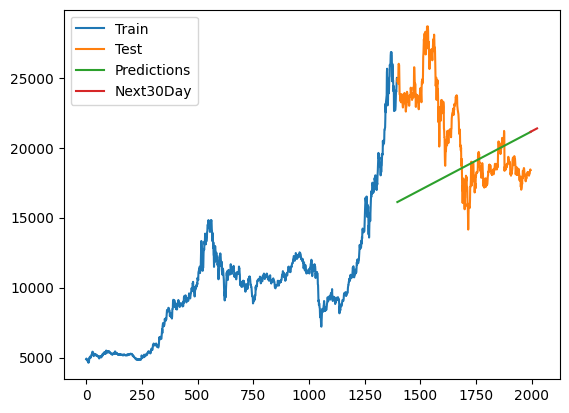

In [11]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [12]:
test_data.index

RangeIndex(start=1397, stop=1996, step=1)

BIDV

In [14]:
#2. Đọc file dữ liệu stock price và chia train test theo tỉ lệ 7:3
bidv = pd.read_csv('/content/BIDV.csv')
bidv = bidv[['Price']]
bidv = bidv.dropna() # Drop missing values
bidv = bidv.reset_index(drop=True) # Reset the index

In [15]:
bidv

,Price
0,14155
1,14225
2,13592
3,13240
4,13380
...,...
1991,41800
1992,42450
1993,43200
1994,43000


In [16]:
#Split the data into training, testing
train_size = int(0.7 * len(bidv))
test_size = len(bidv) - train_size

train_data = bidv[:train_size]
test_data = bidv[train_size:train_size+test_size]

In [17]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [19]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  bidv.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days')
print(y_next_30_days)

Predicted closing prices for the next 30 days
[49656.67885429 49676.66494068 49696.65102706 49716.63711345
 49736.62319983 49756.60928622 49776.5953726  49796.58145899
 49816.56754538 49836.55363176 49856.53971815 49876.52580453
 49896.51189092 49916.4979773  49936.48406369 49956.47015007
 49976.45623646 49996.44232285 50016.42840923 50036.41449562
 50056.400582   50076.38666839 50096.37275477 50116.35884116
 50136.34492754 50156.33101393 50176.31710032 50196.3031867
 50216.28927309 50236.27535947]


In [20]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ",  msle)

Testing RMSE: 5690.899292991189
MAPE: 13.033228011535378
MSLE:  0.021265009802202618


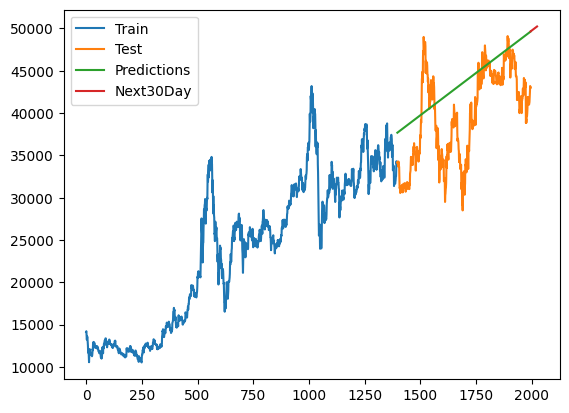

In [21]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1385, stop=1979, step=1)